In [64]:
#import libaraies

import pandas as pd #for Data processing
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns#Data visualization
import missingno as msno # Missing Data visualization
import collections as Counter #Counting

In [65]:
#Load the data set 
df =pd.read_csv(r"C:\Users\epist\Downloads\Public_Transport_Trips_EDA - Sheet1.csv")

In [66]:
df.head()


,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
0,TRIP0001,FERRY,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday


In [67]:
df.tail()

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday
996,TRIP0997,Bus,Central,West End,2024-01-01 22:36:00,63.0,7.772635,35.0,2024-02-11,Thursday
997,TRIP0998,FERRY,West End,North Station,2024-01-01 22:37:00,23.0,NaN,8.0,2024-02-11,Saturday
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday
999,TRIP1000,train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday


In [68]:
#Dimentionality of the data, basically the number if rows and columns
df.shape #---This shows we have 1000 rows and 10columns

(1000, 10)

In [69]:
#Examine the columns/features of the data 
df.columns #..DID THIS TO KNOW THE COLUMN 

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week'],
      dtype='object')

In [70]:
#investigatte the data set for annomalies and data types

df.info() #columns are regarded as features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_ID                1000 non-null   object 
 1   Mode_of_Transport      1000 non-null   object 
 2   Departure_Station      1000 non-null   object 
 3   Arrival_Station        1000 non-null   object 
 4   Departure_Time         1000 non-null   object 
 5   Passenger_Count        900 non-null    float64
 6   Fare_Amount            900 non-null    float64
 7   Trip_Duration_Minutes  900 non-null    float64
 8   Trip_Date              1000 non-null   object 
 9   Day_of_Week            1000 non-null   object 
dtypes: float64(3), object(7)
memory usage: 78.3+ KB


In [71]:
#Numerical and statistical analysis
df.describe()

,Passenger_Count,Fare_Amount,Trip_Duration_Minutes
count,900.000000,900.000000,900.000000
mean,49.154444,25.360742,94.270000
std,27.698270,14.464556,50.634982
min,1.000000,0.500576,5.000000
25%,25.000000,12.818196,49.750000
50%,48.000000,25.403856,97.500000
75%,72.000000,37.866623,138.000000
max,99.000000,49.945184,179.000000


In [72]:
#Categorical statistical analysis

df.describe(include = ['object', 'bool'])

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Trip_Date,Day_of_Week
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,9,7,7,1000,42,7
top,TRIP0001,Bus,North Station,South Point,2024-01-01 06:00:00,2024-01-01,Sunday
freq,1,147,171,171,1,24,167


In [73]:
#Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Trip_ID                    0
Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount              100
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

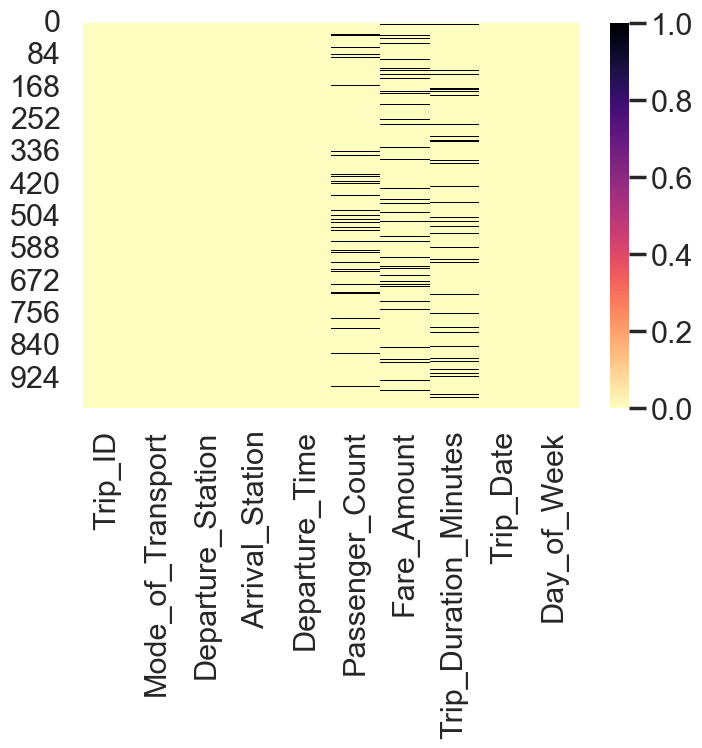

In [74]:
#Investigate the missing data
plt.figure(figsize = (8,5))
sns.heatmap(df.isnull(), cbar = True, cmap = 'magma_r');

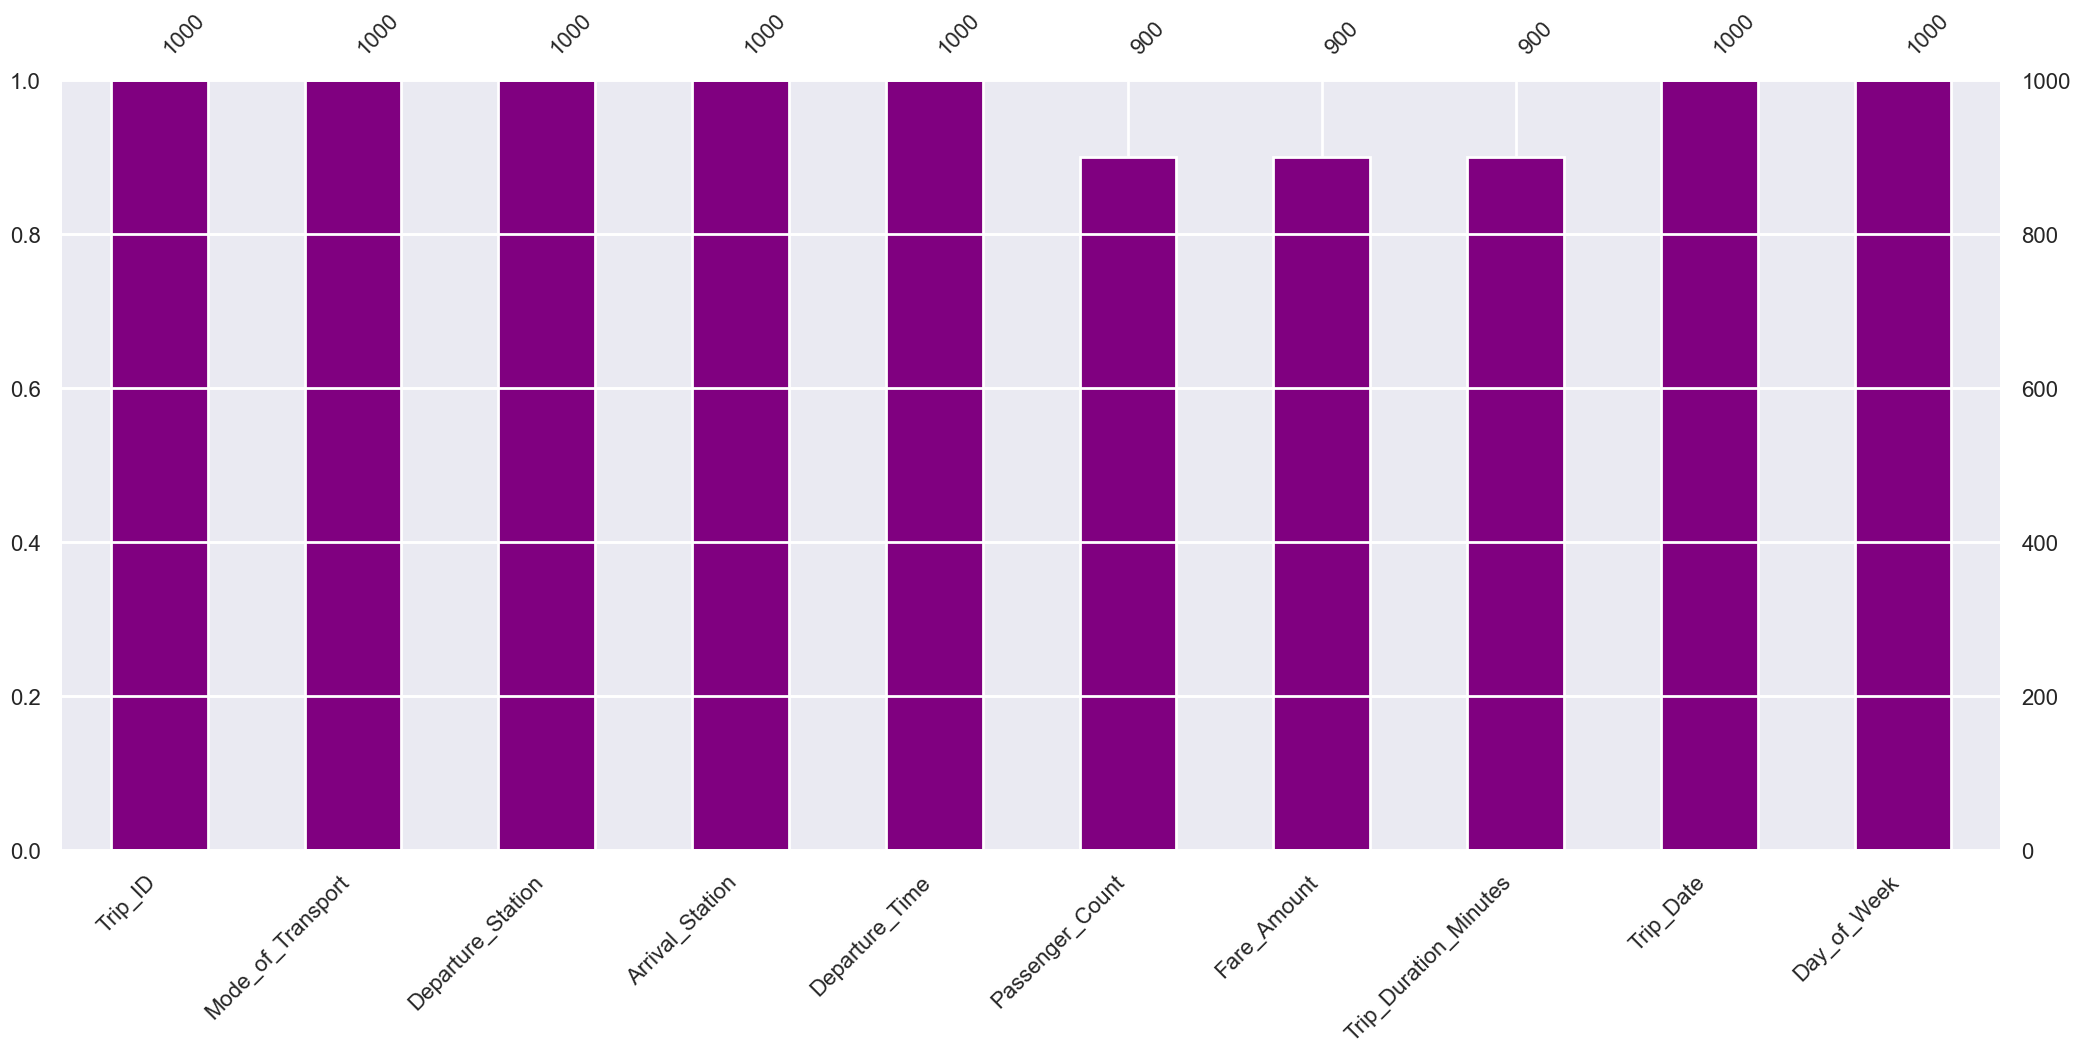

In [75]:
#Used this to S
msno.bar(df,color = 'purple');

In [76]:
#display whehre the missing data exist in the data
df[df.isnull().any (axis=1)]

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week
2,TRIP0003,bus,Central,North Station,2024-01-01 06:02:00,91.0,NaN,NaN,2024-01-01,Tuesday
3,TRIP0004,FERRY,Downtown,Central,2024-01-01 06:03:00,27.0,3.767487,NaN,2024-01-01,Sunday
4,TRIP0005,Ferry,Downtown,Central,2024-01-01 06:04:00,66.0,NaN,NaN,2024-01-01,Monday
7,TRIP0008,FERRY,Central,South Point,2024-01-01 06:07:00,9.0,NaN,14.0,2024-01-01,Saturday
21,TRIP0022,train,North Station,South Point,2024-01-01 06:21:00,16.0,NaN,26.0,2024-01-01,Monday
...,...,...,...,...,...,...,...,...,...,...
982,TRIP0983,Train,Airport,Airport,2024-01-01 22:22:00,25.0,48.404193,NaN,2024-02-10,Monday
984,TRIP0985,Train,South Point,Central,2024-01-01 22:24:00,1.0,14.279240,NaN,2024-02-11,Sunday
985,TRIP0986,Train,Downtown,Downtown,2024-01-01 22:25:00,15.0,NaN,47.0,2024-02-11,Sunday
995,TRIP0996,train,North Station,West End,2024-01-01 22:35:00,NaN,40.546670,51.0,2024-02-11,Saturday


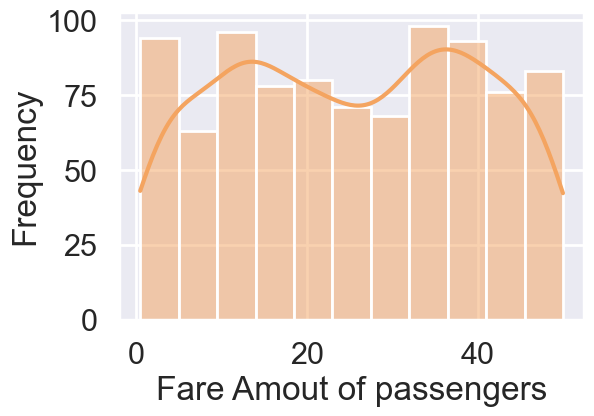

In [77]:
#USED HISPLOT TO CHECK FOR SKEWESS, AND DETRMINE HOW TO HANDLE MISSIMG VALUES 

sns.set(style = 'darkgrid', palette= 'viridis', context = 'poster')
plt.figure(figsize = (6,4))
sns.histplot(df['Fare_Amount'], kde =True, color = 'Sandybrown')
plt.xlabel('Fare Amout of passengers')
plt.ylabel('Frequency')

plt.show()

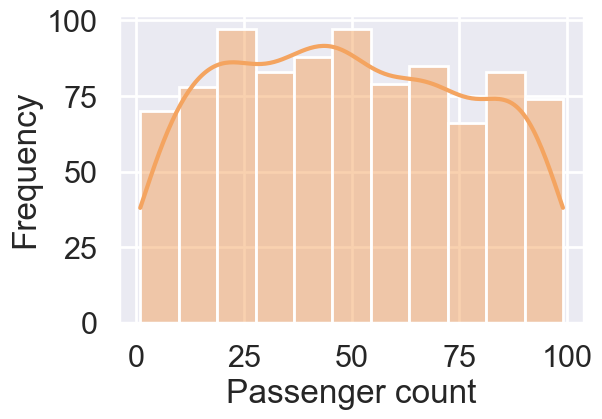

In [78]:
sns.set(style = 'darkgrid', palette= 'viridis', context = 'poster')
plt.figure(figsize = (6,4))
sns.histplot(df['Passenger_Count'], kde =True, color = 'Sandybrown')
plt.xlabel('Passenger count')
plt.ylabel('Frequency')

plt.show()

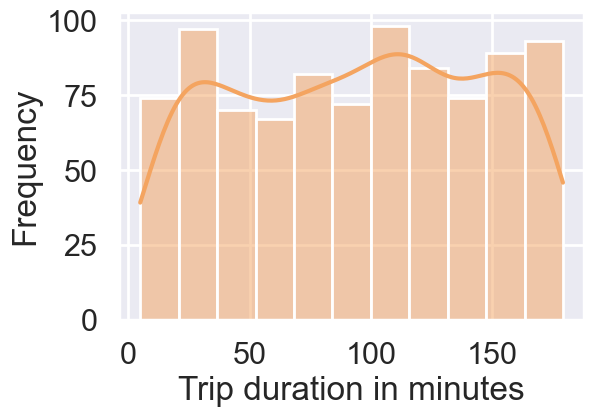

In [79]:
sns.set(style = 'darkgrid', palette= 'viridis', context = 'poster')
plt.figure(figsize = (6,4))
sns.histplot(df['Trip_Duration_Minutes'], kde =True, color = 'Sandybrown')
plt.xlabel('Trip duration in minutes')
plt.ylabel('Frequency')

plt.show()

In [80]:
df['Fare_Amount'].fillna(df['Fare_Amount'].median(), inplace=True)

C:\Users\epist\AppData\Local\Temp\ipykernel_22460\3756256113.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare_Amount'].fillna(df['Fare_Amount'].median(), inplace=True)


In [81]:
null_vals = df.isnull().sum()
null_vals

Trip_ID                    0
Mode_of_Transport          0
Departure_Station          0
Arrival_Station            0
Departure_Time             0
Passenger_Count          100
Fare_Amount                0
Trip_Duration_Minutes    100
Trip_Date                  0
Day_of_Week                0
dtype: int64

In [82]:
df['Passenger_Count'].fillna(df['Passenger_Count'].median(), inplace=True)

C:\Users\epist\AppData\Local\Temp\ipykernel_22460\4067291537.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Passenger_Count'].fillna(df['Passenger_Count'].median(), inplace=True)


In [83]:
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median(), inplace=True)


C:\Users\epist\AppData\Local\Temp\ipykernel_22460\4258980630.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].median(), inplace=True)


In [118]:
df.isnull().sum()


Trip_ID                  0
Mode_of_Transport        0
Departure_Station        0
Arrival_Station          0
Departure_Time           0
Passenger_Count          0
Fare_Amount              0
Trip_Duration_Minutes    0
Trip_Date                0
Day_of_Week              0
year                     0
month                    0
month_name               0
quarter                  0
Passenger_Group          0
Fare_Group               0
Trip_Status              0
dtype: int64

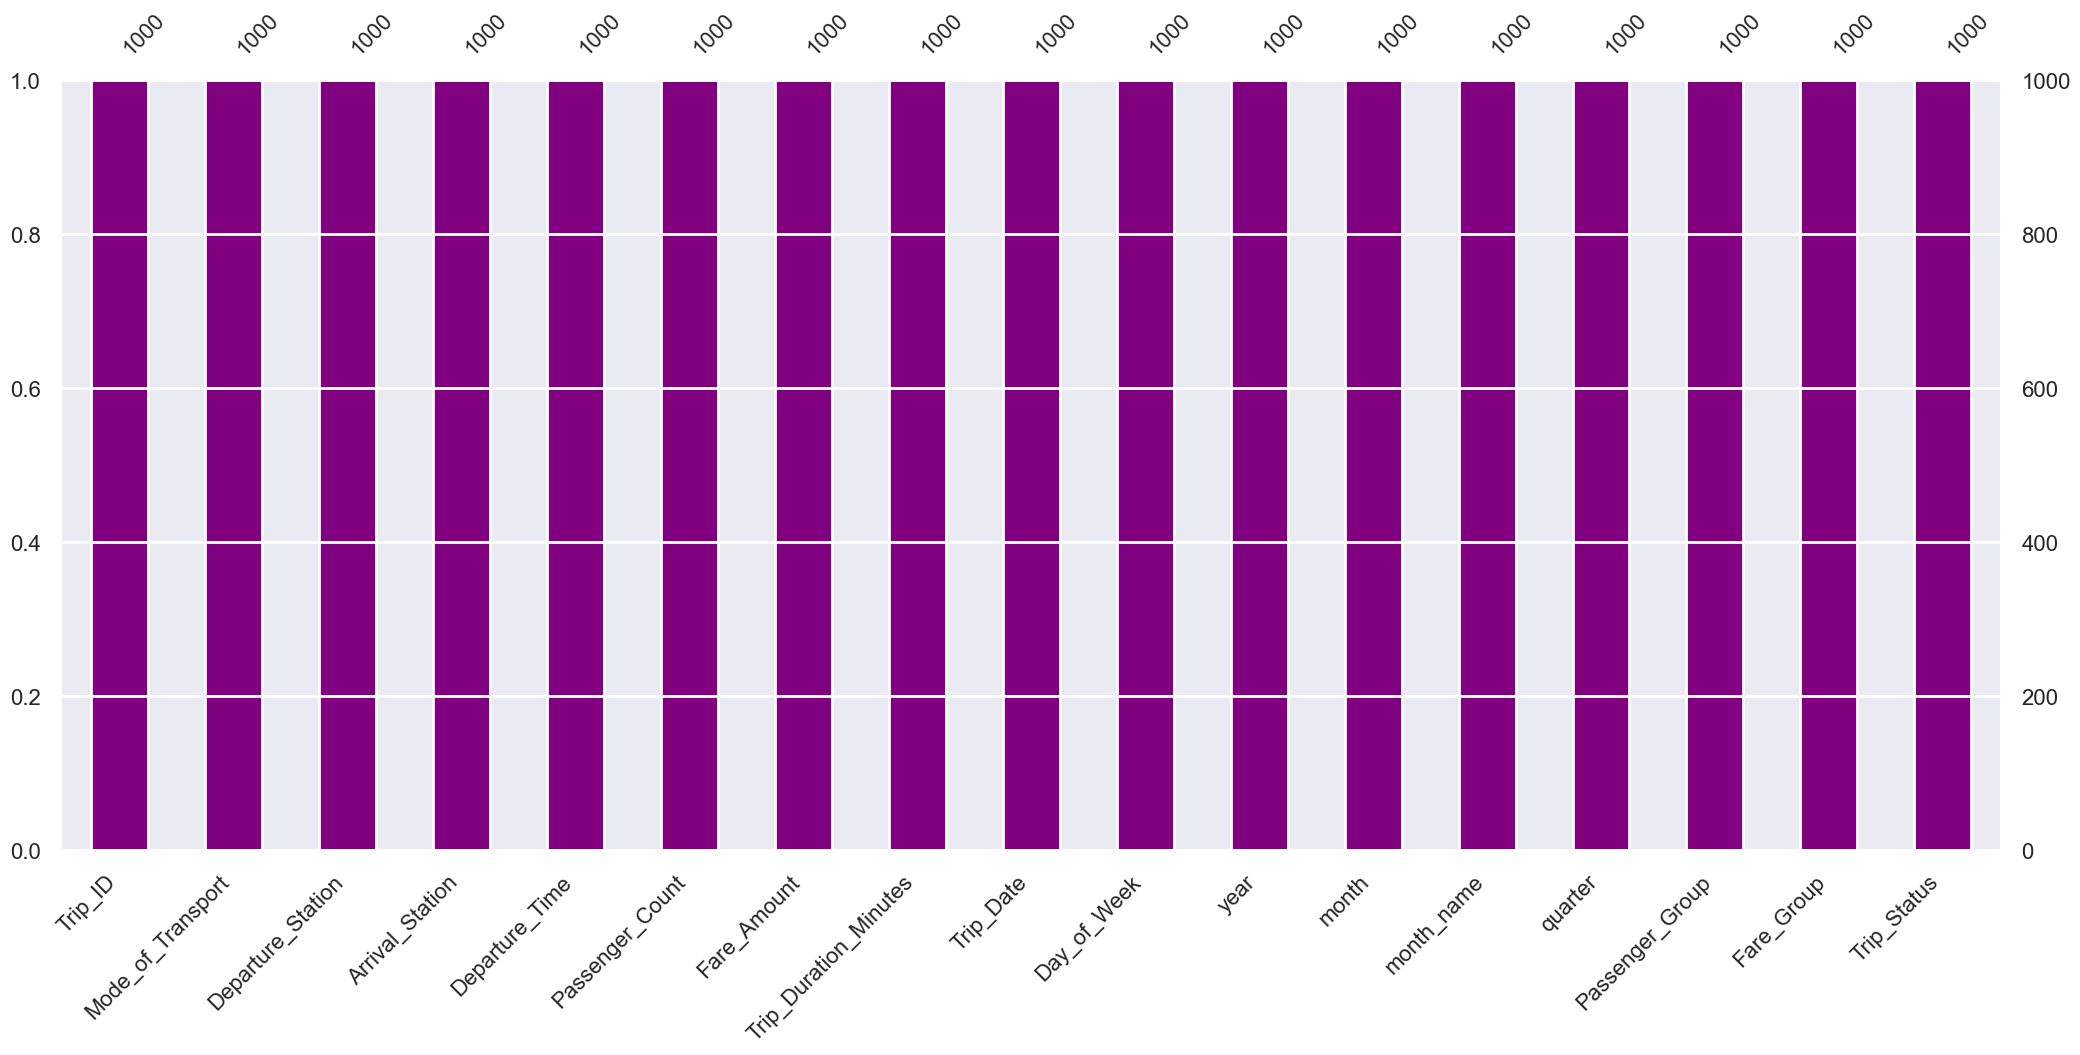

In [119]:
msno.bar(df,color = 'purple');

In [120]:
#DATETIME ANALYSIS 
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Passenger_Group,Fare_Group,Trip_Status
0,TRIP0001,Ferry,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,1-25 (Low),0-12 (Low Fare),Yes (Departed and Arrived)
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,26-50 (Medium),13-25 (Medium Fare),Yes (Departed and Arrived)


In [121]:
#Convert the data columnn into the pandas date time object
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   object        
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  year                   1000 non-null   int32         
 11  month                  1000 non-null   int32         
 12  month_name             1000 non-null   object        
 13  quar

In [122]:
df['Trip_Date'] = pd.to_datetime(df['Trip_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Trip_ID                1000 non-null   object        
 1   Mode_of_Transport      1000 non-null   object        
 2   Departure_Station      1000 non-null   object        
 3   Arrival_Station        1000 non-null   object        
 4   Departure_Time         1000 non-null   object        
 5   Passenger_Count        1000 non-null   float64       
 6   Fare_Amount            1000 non-null   float64       
 7   Trip_Duration_Minutes  1000 non-null   float64       
 8   Trip_Date              1000 non-null   datetime64[ns]
 9   Day_of_Week            1000 non-null   object        
 10  year                   1000 non-null   int32         
 11  month                  1000 non-null   int32         
 12  month_name             1000 non-null   object        
 13  quar

In [123]:
#EXTRACT THE YEAR, MONTH AND QUATER

df['year']=df['Trip_Date'].dt.year
df['month']=df['Trip_Date'].dt.month
df['month_name']=df['Trip_Date'].dt.month_name()
df['quarter']=df['Trip_Date'].dt.quarter

df.tail(3)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Passenger_Group,Fare_Group,Trip_Status
997,TRIP0998,Ferry,West End,North Station,2024-01-01 22:37:00,23.0,25.403856,8.0,2024-02-11,Saturday,2024,2,February,1,1-25 (Low),26-38 (High Fare),Yes (Departed and Arrived)
998,TRIP0999,Tram,South Point,Central,2024-01-01 22:38:00,9.0,43.300617,169.0,2024-02-11,Sunday,2024,2,February,1,1-25 (Low),39-50 (Very High Fare),Yes (Departed and Arrived)
999,TRIP1000,Train,Airport,West End,2024-01-01 22:39:00,34.0,8.168803,21.0,2024-02-11,Tuesday,2024,2,February,1,26-50 (Medium),0-12 (Low Fare),Yes (Departed and Arrived)


In [124]:
def passenger_group(x):
    if x <= 25:
        return '1-25 (Low)'
    elif x <= 50:
        return '26-50 (Medium)'
    elif x <= 75:
        return '51-75 (High)'
    else:
        return '76-99 (Very High)'

# Apply the function to create a new column
df['Passenger_Group'] = df['Passenger_Count'].apply(passenger_group)

# View the result
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Passenger_Group,Fare_Group,Trip_Status
0,TRIP0001,Ferry,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,1-25 (Low),0-12 (Low Fare),Yes (Departed and Arrived)
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,26-50 (Medium),13-25 (Medium Fare),Yes (Departed and Arrived)


In [125]:
# Define a function to group fare amount
def fare_group(x):
    if x <= 12:
        return '0-12 (Low Fare)'
    elif x <= 25:
        return '13-25 (Medium Fare)'
    elif x <= 38:
        return '26-38 (High Fare)'
    else:
        return '39-50 (Very High Fare)'

# Apply the function to create a new column
df['Fare_Group'] = df['Fare_Amount'].apply(fare_group)

# View the result
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Passenger_Group,Fare_Group,Trip_Status
0,TRIP0001,Ferry,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,1-25 (Low),0-12 (Low Fare),Yes (Departed and Arrived)
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,26-50 (Medium),13-25 (Medium Fare),Yes (Departed and Arrived)


In [126]:
def trip_status(row):
    if pd.notnull(row['Departure_Station']) and pd.notnull(row['Arrival_Station']):
        return 'Yes (Departed and Arrived)'
    else:
        return "No (Departed but Didn't Arrive)"

# Apply the function
df['Trip_Status'] = df.apply(trip_status, axis=1)

# View result
df.head(2)

,Trip_ID,Mode_of_Transport,Departure_Station,Arrival_Station,Departure_Time,Passenger_Count,Fare_Amount,Trip_Duration_Minutes,Trip_Date,Day_of_Week,year,month,month_name,quarter,Passenger_Group,Fare_Group,Trip_Status
0,TRIP0001,Ferry,West End,airport,2024-01-01 06:00:00,21.0,4.343642,26.0,2024-01-01,Sunday,2024,1,January,1,1-25 (Low),0-12 (Low Fare),Yes (Departed and Arrived)
1,TRIP0002,Tram,North Station,Downtown,2024-01-01 06:01:00,46.0,20.673380,134.0,2024-01-01,Saturday,2024,1,January,1,26-50 (Medium),13-25 (Medium Fare),Yes (Departed and Arrived)


In [127]:
#UNIVARIATE ANALYSIS
df.columns

Index(['Trip_ID', 'Mode_of_Transport', 'Departure_Station', 'Arrival_Station',
       'Departure_Time', 'Passenger_Count', 'Fare_Amount',
       'Trip_Duration_Minutes', 'Trip_Date', 'Day_of_Week', 'year', 'month',
       'month_name', 'quarter', 'Passenger_Group', 'Fare_Group',
       'Trip_Status'],
      dtype='object')

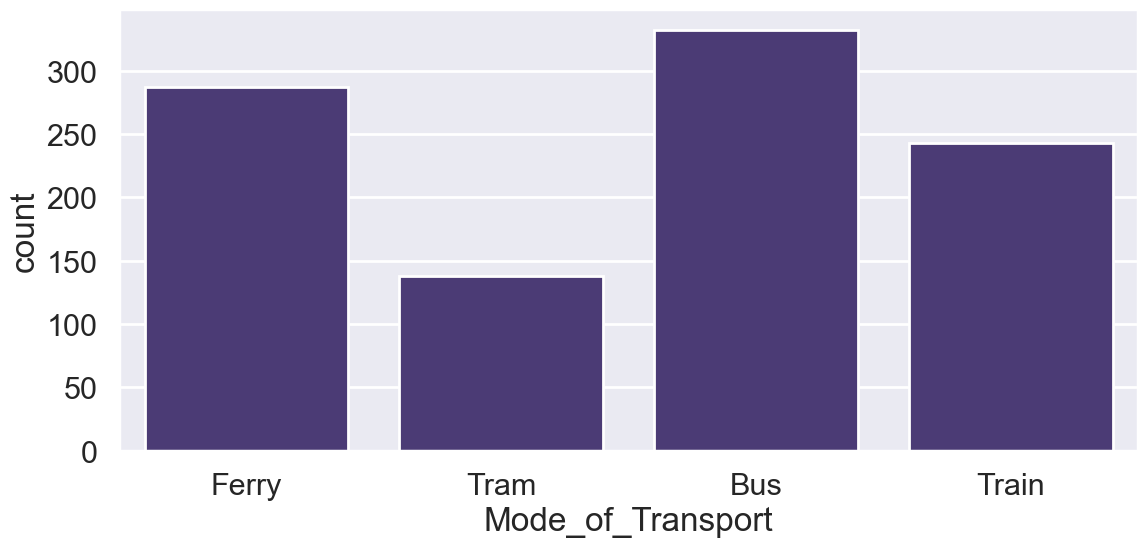

In [128]:
plt.figure(figsize=(12, 6))  # Set figure size here, not in countplot
sns.countplot(x='Mode_of_Transport', data=df)
plt.tight_layout()

In [129]:
df['Mode_of_Transport'] = df['Mode_of_Transport'].str.title()
print(df['Mode_of_Transport'].unique())

['Ferry' 'Tram' 'Bus' 'Train']


['Ferry' 'Tram' 'Bus' 'Train']


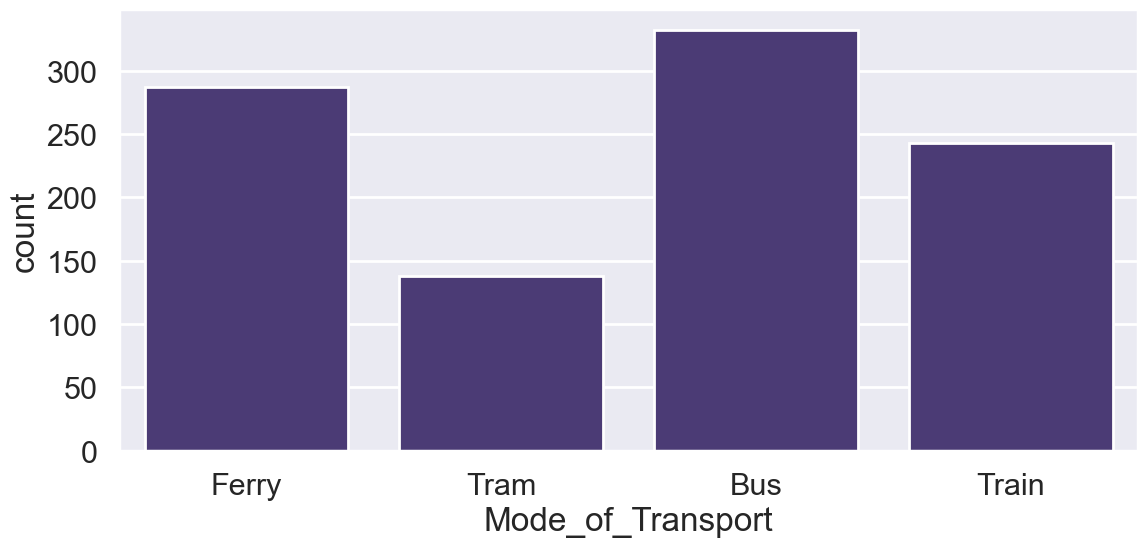

In [130]:
df['Mode_of_Transport'] = df['Mode_of_Transport'].str.title()

# This will convert:
# - 'FERRY', 'fErry', 'Ferry' all to 'Ferry'
# - 'BUS', 'Bus', 'bus' all to 'Bus'

# If you need to verify the unique values after transformation:
print(df['Mode_of_Transport'].unique())

# Then create your plot with standardized values
plt.figure(figsize=(12, 6))
sns.countplot(x='Mode_of_Transport', data=df)
plt.tight_layout()

In [131]:
df['Mode_of_Transport'].value_counts()

Mode_of_Transport
Bus      332
Ferry    287
Train    243
Tram     138
Name: count, dtype: int64

In [132]:
unique_modes = df['Mode_of_Transport'].unique()
print(sorted(unique_modes))

['Bus', 'Ferry', 'Train', 'Tram']


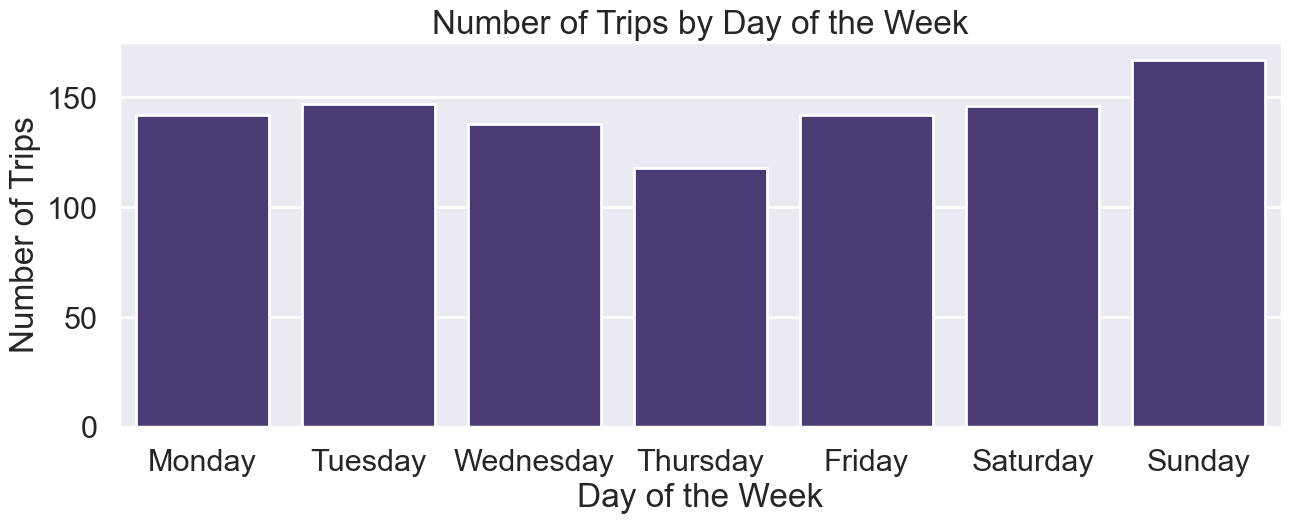

In [133]:
plt.figure(figsize=(15,5))
sns.countplot(x='Day_of_Week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Trips by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.show()

In [134]:
df['Day_of_Week'].value_counts()

Day_of_Week
Sunday       167
Tuesday      147
Saturday     146
Monday       142
Friday       142
Wednesday    138
Thursday     118
Name: count, dtype: int64

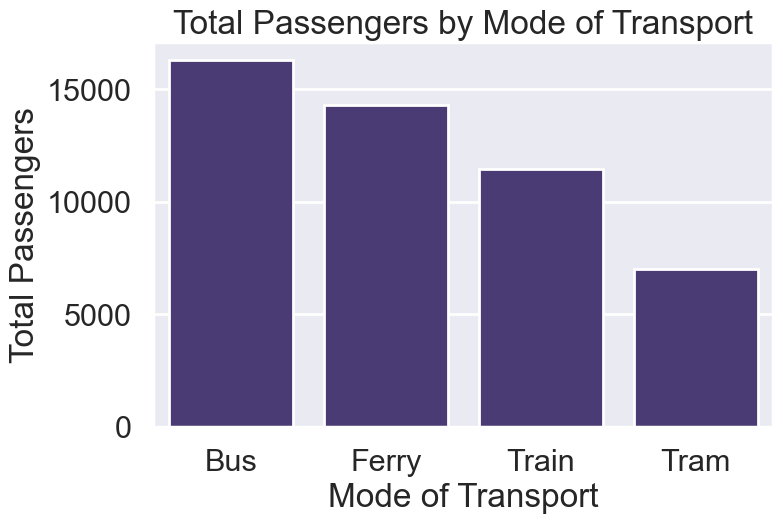

In [135]:
#. How Many Passengers Use Each Transport Mode

# Total passengers per transport mode
df.groupby('Mode_of_Transport')['Passenger_Count'].sum().sort_values(ascending=False)

passenger_by_mode = df.groupby('Mode_of_Transport')['Passenger_Count'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=passenger_by_mode.index, y=passenger_by_mode.values)
plt.title('Total Passengers by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Total Passengers')
plt.show()

In [ ]:
#BIVARIATE ANALYSIS

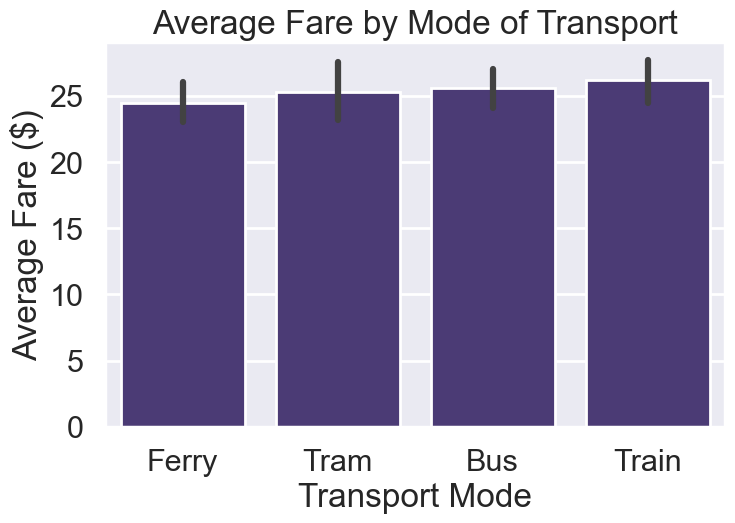

In [136]:
plt.figure(figsize=(8,5))
sns.barplot(x='Mode_of_Transport', y='Fare_Amount', data=df, estimator='mean')
plt.title('Average Fare by Mode of Transport')
plt.xlabel('Transport Mode')
plt.ylabel('Average Fare ($)')
plt.show()

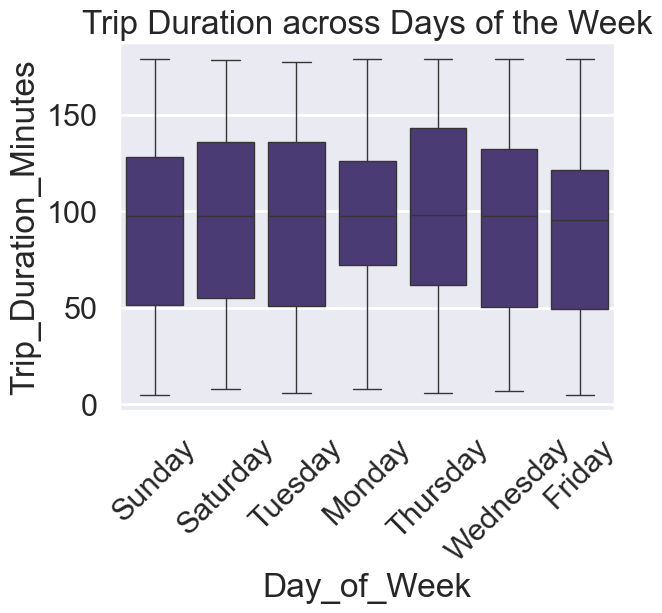

In [138]:

sns.boxplot(x='Day_of_Week', y='Trip_Duration_Minutes', data=df)
plt.title('Trip Duration across Days of the Week')
plt.xticks(rotation=45)
plt.show()

#Heavier traffic or congestion on Thursdays, causing longer travel times.

#Longer-distance trips are more common on Thursdays—maybe due to specific events or schedules.

#Operational differences in transport on Thursdays (e.g., fewer vehicles, slower services).

#Possible delays or disruptions affecting trips more on Thursdays.

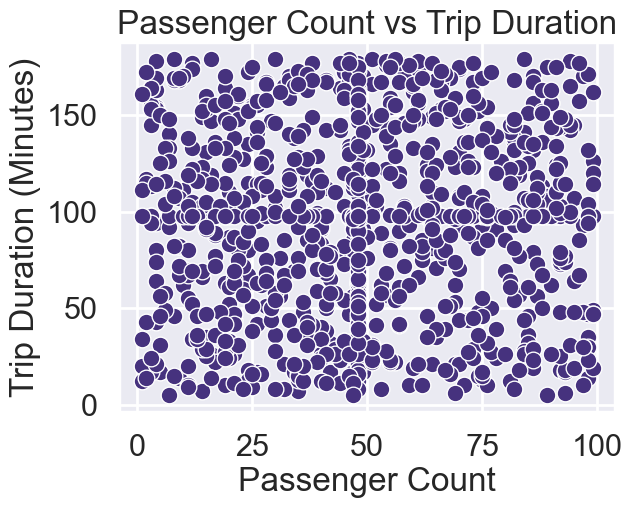

In [157]:
sns.scatterplot(x='Passenger_Count', y='Trip_Duration_Minutes', data=df)
plt.title('Passenger Count vs Trip Duration')
plt.xlabel('Passenger Count')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

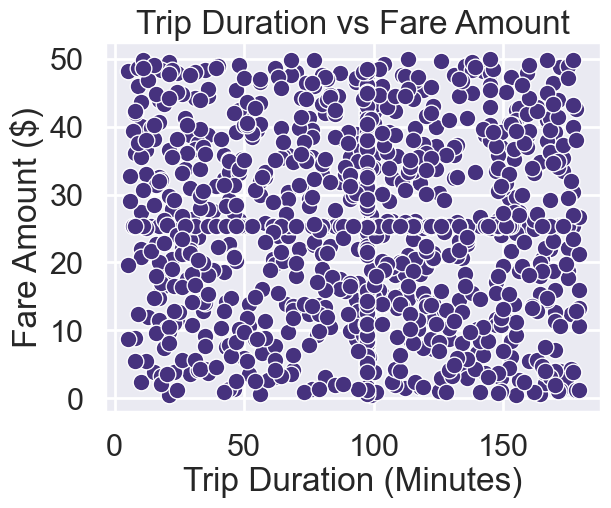

In [158]:
sns.scatterplot(x='Trip_Duration_Minutes', y='Fare_Amount', data=df)
plt.title('Trip Duration vs Fare Amount')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

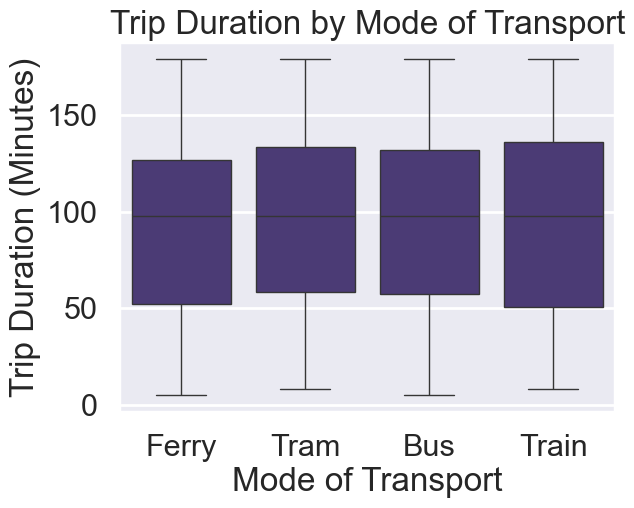

In [160]:
sns.boxplot(x='Mode_of_Transport', y='Trip_Duration_Minutes', data=df)
plt.title('Trip Duration by Mode of Transport')
plt.xlabel('Mode of Transport')
plt.ylabel('Trip Duration (Minutes)')
plt.show()

#Trains typically cover longer distances or have more stops compared to ferries in your dataset, which results in longer trip durations.

#Ferries might be operating on shorter routes or faster schedules, so their trips take less time.

#The nature of the transportation mode often determines trip length: trains usually serve longer commuter or intercity routes, while ferries might cover shorter water crossings

C:\Users\epist\AppData\Local\Temp\ipykernel_22460\1172014231.py:7: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


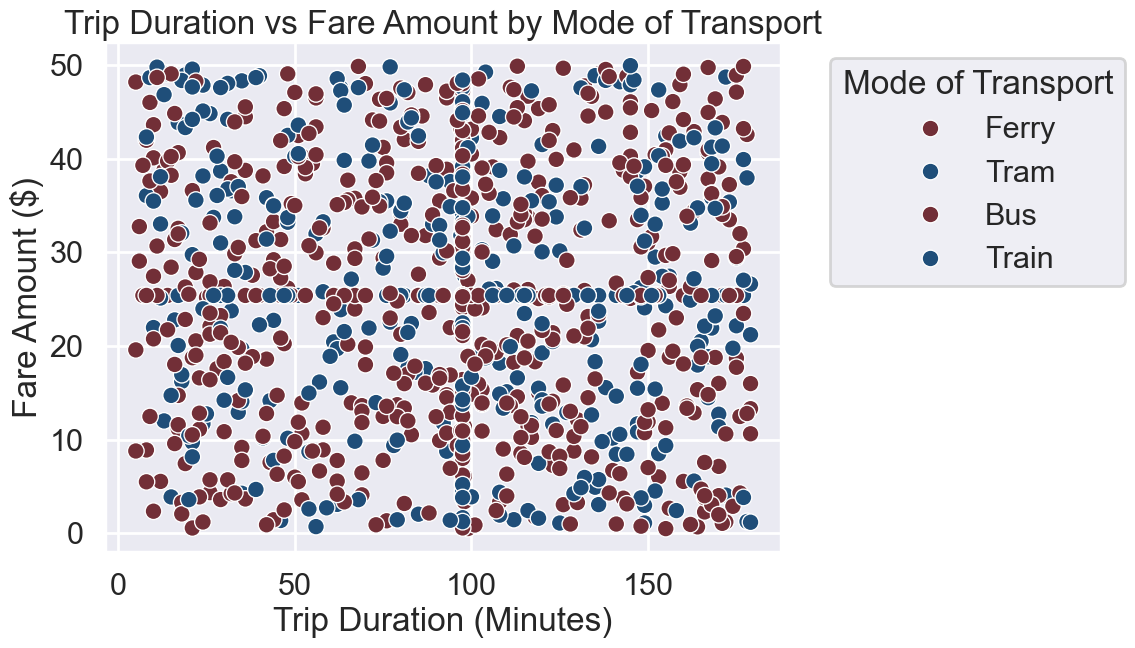

In [166]:
#MULTI VARIATE ANALYSIS 

plt.figure(figsize=(12, 7))

custom_palette = ['#722f37', '#1f4e79']  # wine and blue

sns.scatterplot(
    x='Trip_Duration_Minutes',
    y='Fare_Amount',
    hue='Mode_of_Transport',
    data=df,
    palette=custom_palette
)

plt.title('Trip Duration vs Fare Amount by Mode of Transport')
plt.xlabel('Trip Duration (Minutes)')
plt.ylabel('Fare Amount ($)')

# Move legend outside the plot on the right
plt.legend(title='Mode of Transport', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

C:\Users\epist\AppData\Local\Temp\ipykernel_22460\93132117.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


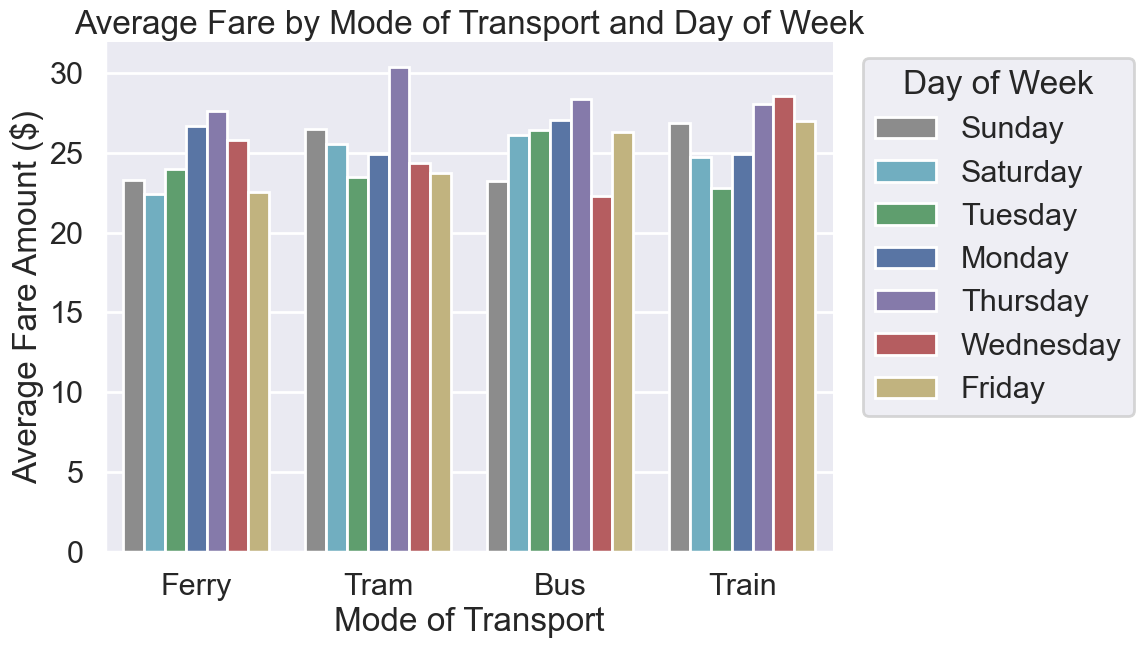

In [174]:
# Custom color palette: same color for same day across all bars
custom_palette = {
    'Monday': '#4C72B0',     # blue
    'Tuesday': '#55A868',    # green
    'Wednesday': '#C44E52',  # red
    'Thursday': '#8172B2',   # purple
    'Friday': '#CCB974',     # gold
    'Saturday': '#64B5CD',   # teal
    'Sunday': '#8C8C8C'      # gray
}

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Mode_of_Transport',
    y='Fare_Amount',
    hue='Day_of_Week',
    estimator='mean',
    ci=None,
    dodge=0.6,  # Reduce space between bars in a group
    data=df,
    palette=custom_palette
)

plt.title('Average Fare by Mode of Transport and Day of Week')
plt.xlabel('Mode of Transport')
plt.ylabel('Average Fare Amount ($)')
plt.xticks(rotation=0)
sns.despine()
plt.legend(title='Day of Week', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

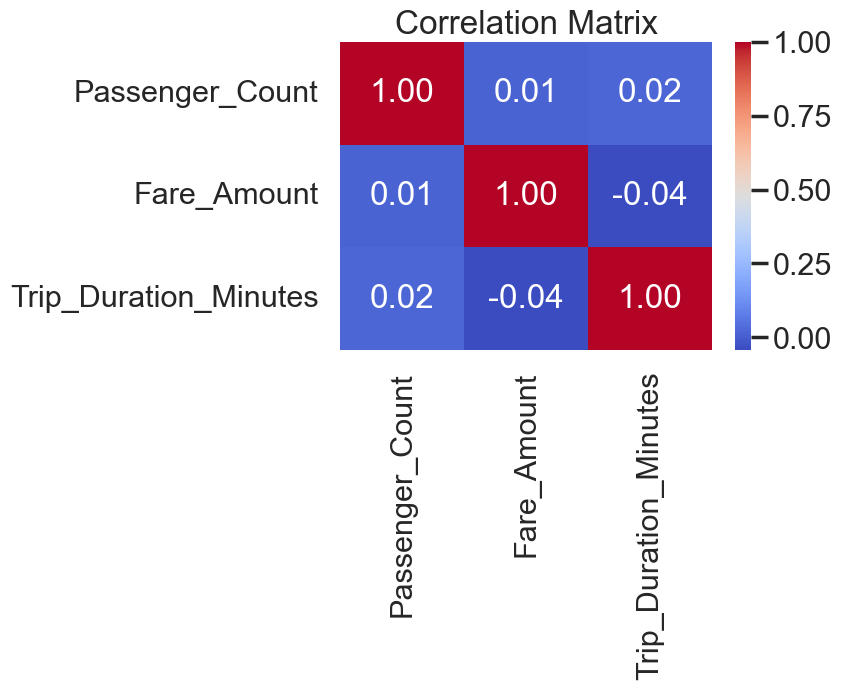

In [137]:
# Select only numeric columns
numeric_df = df[['Passenger_Count', 'Fare_Amount', 'Trip_Duration_Minutes']]

# Compute correlation matrix
corr = numeric_df.corr()

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

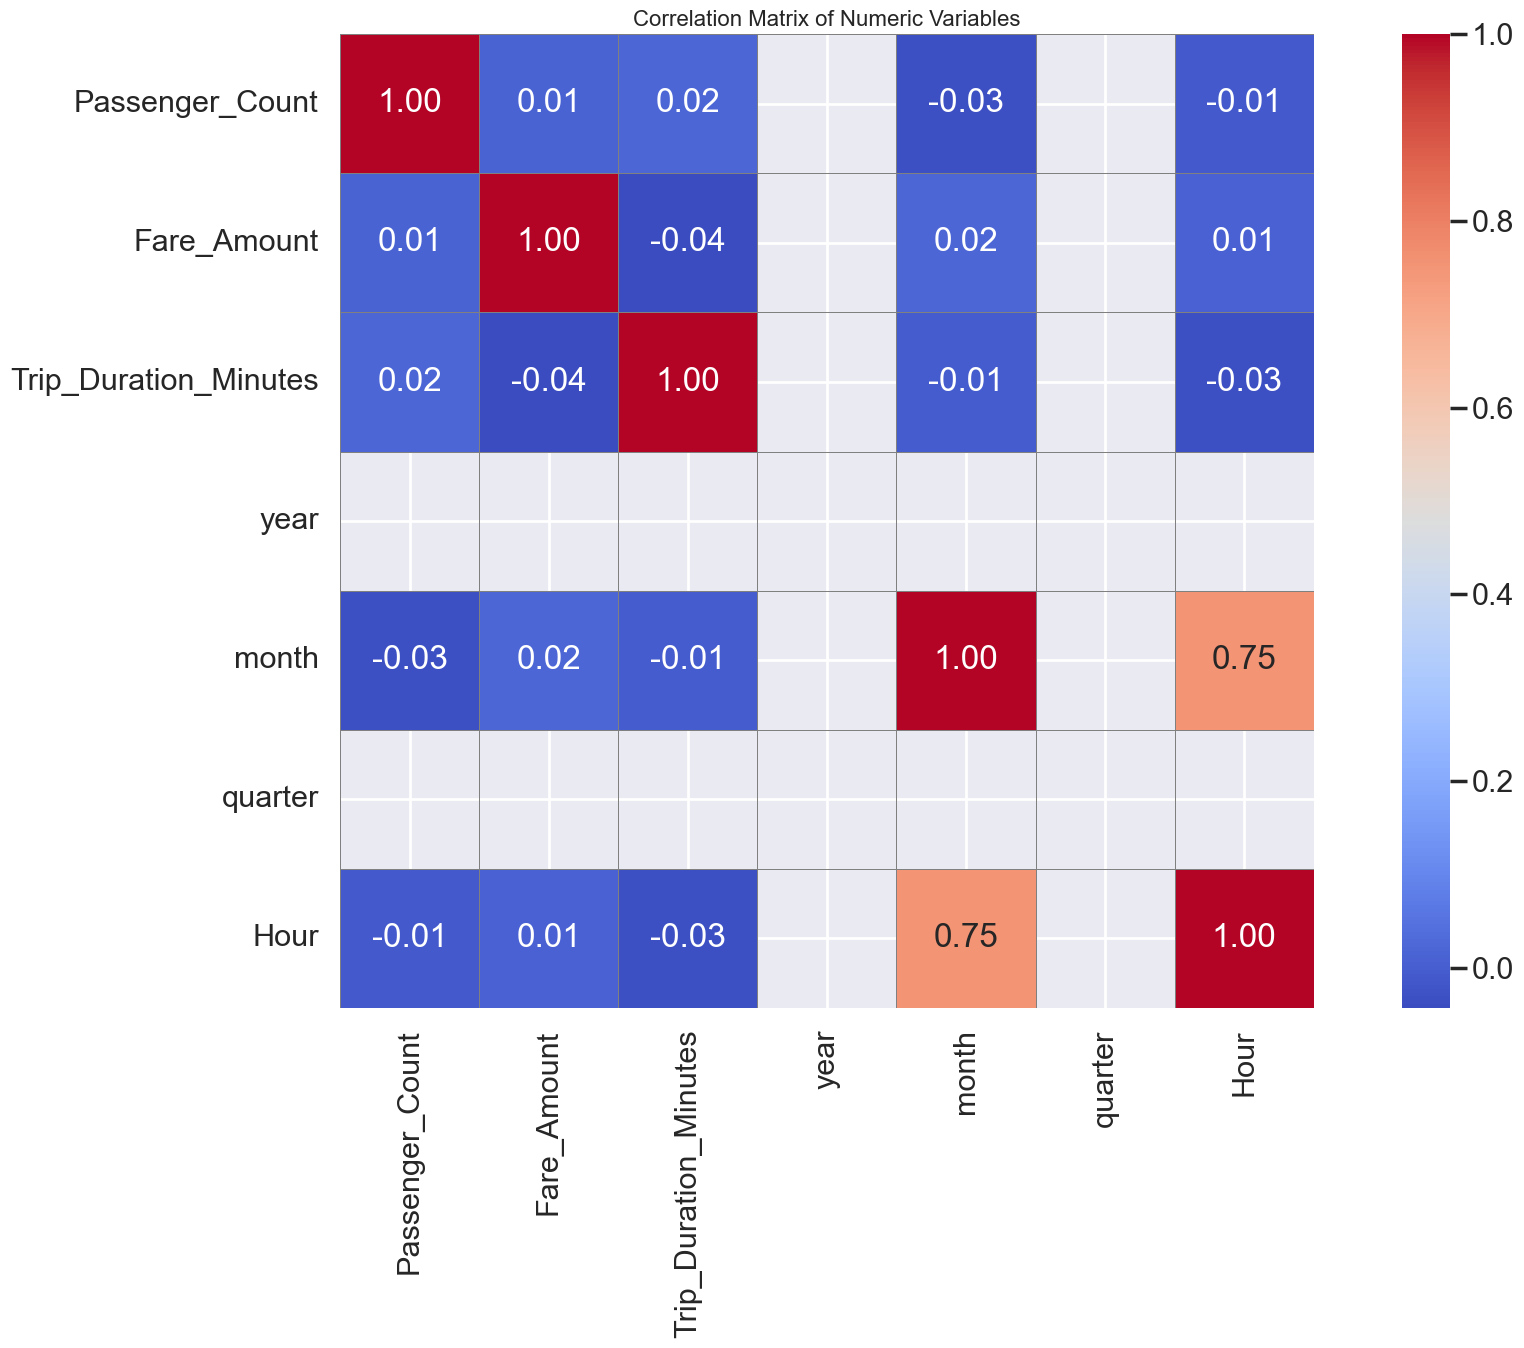

In [179]:

# Select all numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Set up the larger figure
plt.figure(figsize=(20, 14))  # Wider and taller for better visibility

# Create the heatmap
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    linecolor='gray',
    square=True
)

plt.title('Correlation Matrix of Numeric Variables', fontsize=16)
plt.tight_layout()
plt.show()